### 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기

In [2]:
df = pd.read_csv('eoraptor.csv')
df

,case,site,sex,age,head_length,skull_width,total_length,tail_length,foot_length,earconch,eye,chest,belly
0,1,1,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   case          104 non-null    int64  
 1   site          104 non-null    int64  
 2   sex           104 non-null    object 
 3   age           102 non-null    float64
 4   head_length   104 non-null    float64
 5   skull_width   104 non-null    float64
 6   total_length  104 non-null    float64
 7   tail_length   104 non-null    float64
 8   foot_length   103 non-null    float64
 9   earconch      104 non-null    float64
 10  eye           104 non-null    float64
 11  chest         104 non-null    float64
 12  belly         104 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 10.7+ KB


In [4]:
# 결측치 제거
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   case          101 non-null    int64  
 1   site          101 non-null    int64  
 2   sex           101 non-null    object 
 3   age           101 non-null    float64
 4   head_length   101 non-null    float64
 5   skull_width   101 non-null    float64
 6   total_length  101 non-null    float64
 7   tail_length   101 non-null    float64
 8   foot_length   101 non-null    float64
 9   earconch      101 non-null    float64
 10  eye           101 non-null    float64
 11  chest         101 non-null    float64
 12  belly         101 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 11.0+ KB


In [5]:
print(f"성별: {df['sex'].unique()}")
print(f"발굴 장소: {df['site'].unique()}")

성별: ['m' 'f']
발굴 장소: [1 2 3 4 5 6 7]


# train, test 하나씩만 분할

In [6]:
# train/test 분할할
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# 2. 탐색적 데이터 분석 (EDA)

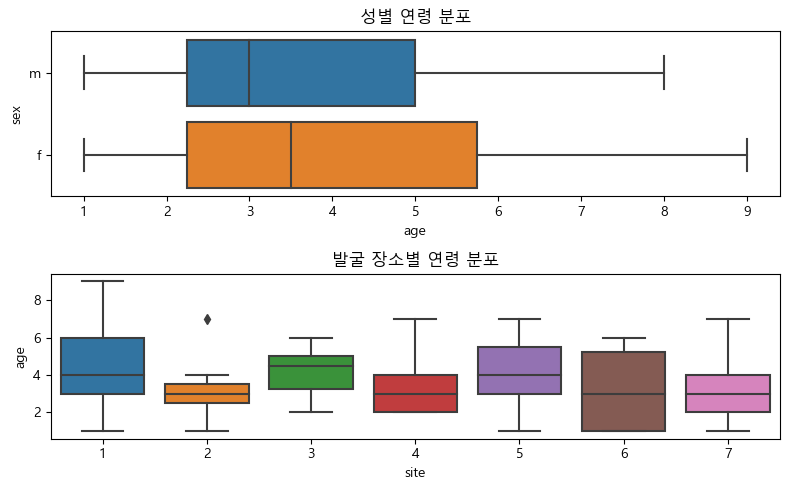

In [7]:
fig, axes = plt.subplots(2, figsize=(8, 5))

sns.boxplot(x='age', y='sex', data=df_train, ax=axes[0])
axes[0].set_title('성별 연령 분포')

sns.boxplot(x='site', y='age', data=df_train, ax=axes[1])
axes[1].set_title('발굴 장소별 연령 분포')

plt.tight_layout()
plt.show()

In [8]:
tl_age_by_sex = df_train.pivot_table('total_length', index='age', columns='sex', aggfunc='mean')
tl_age_by_sex # 연령에 따른 평균 길이

sex,f,m
age,,
1.0,85.000000,81.785714
2.0,85.166667,88.000000
3.0,88.437500,87.208333
4.0,90.333333,85.250000
5.0,88.800000,88.125000
6.0,91.000000,89.125000
7.0,NaN,86.400000
8.0,NaN,89.000000
9.0,90.500000,NaN


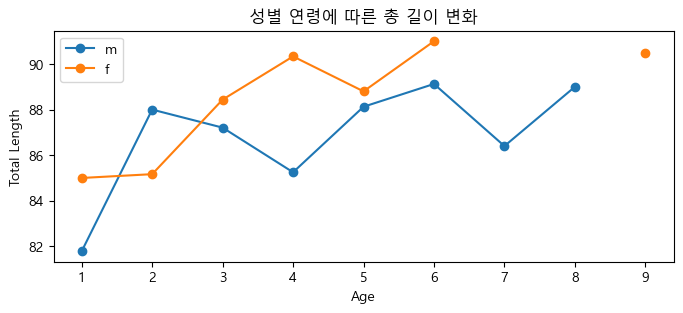

In [9]:
tl_age_by_sex = tl_age_by_sex[['m', 'f']]

plt.figure(figsize=(8, 3))
plt.plot(tl_age_by_sex, marker='o') # 하나만 동떨어지게 있으면 안 나오기 때문에 marker='o' 추가
plt.legend(tl_age_by_sex.columns)
plt.title('성별 연령에 따른 총 길이 변화')
plt.xlabel('Age')
plt.ylabel('Total Length')
plt.show()

In [10]:
tl_age_by_site = df_train.pivot_table('total_length', index='age', columns='site', aggfunc='mean')
tl_age_by_site # 연령에 따른 평균 길이

site,1,2,3,4,5,6,7
age,,,,,,,
1.0,90.000,75.000000,NaN,NaN,81.250000,82.0,82.000000
2.0,85.600,81.000000,89.0,90.25,NaN,NaN,86.250000
3.0,91.500,80.833333,91.0,91.00,88.666667,83.5,85.333333
4.0,87.750,85.000000,85.0,93.00,85.000000,NaN,84.666667
5.0,89.375,NaN,86.5,NaN,88.500000,89.0,NaN
6.0,91.900,NaN,93.5,NaN,89.250000,86.5,89.000000
7.0,90.000,80.500000,NaN,91.50,86.000000,NaN,84.000000
8.0,89.000,NaN,NaN,NaN,NaN,NaN,NaN
9.0,90.500,NaN,NaN,NaN,NaN,NaN,NaN


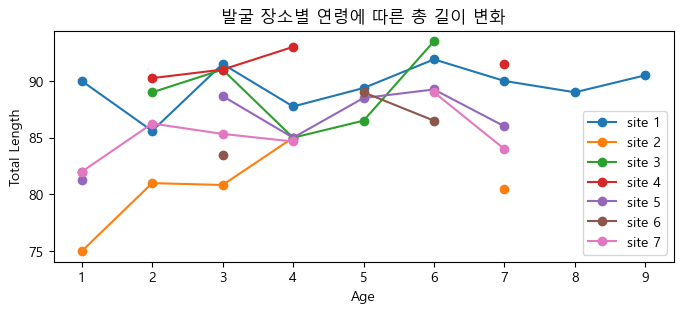

In [11]:
plt.figure(figsize=(8, 3))
plt.plot(tl_age_by_site, marker='o')
plt.legend([f"site {i}" for i in tl_age_by_site.columns])
plt.title('발굴 장소별 연령에 따른 총 길이 변화')
plt.xlabel('Age')
plt.ylabel('Total Length')
plt.show()

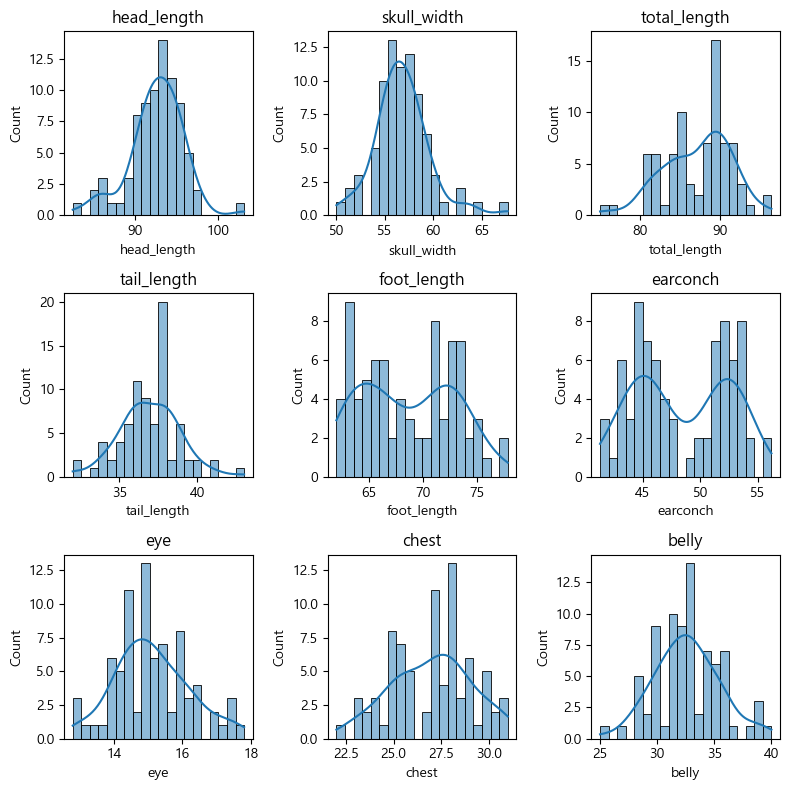

In [12]:
measured = df_train.columns[4:] # head_length부터 belly까지 열 이름

fig, axes = plt.subplots(3,3, figsize=(8,8))
axes = axes.ravel()

for idx, col in enumerate(measured):
    sns.histplot(x=col, data=df_train, ax=axes[idx], bins=20, kde=True)
    axes[idx].set_title(str(col))
plt.tight_layout()
plt.show()

# foot_length와 earconch는 정규분포를 안 따르고 있음

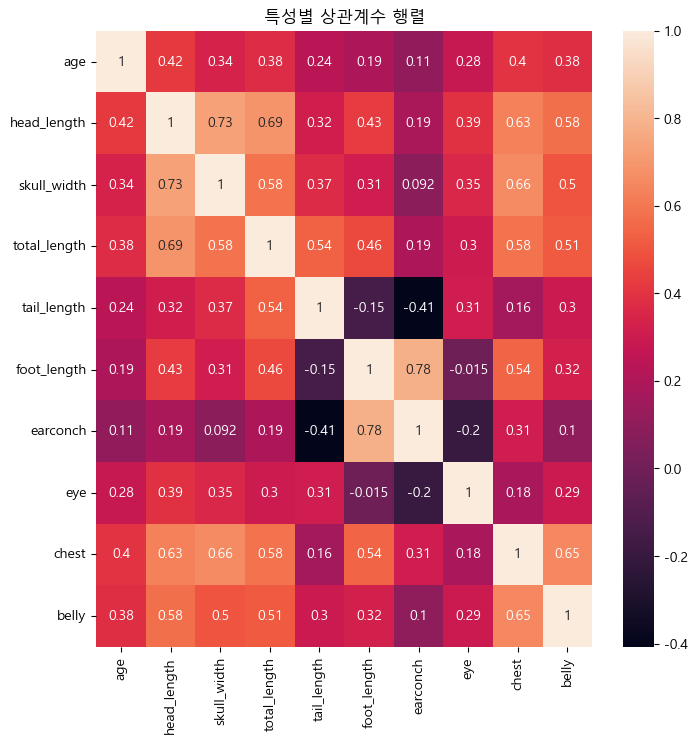

In [13]:
numeric_cols = ['age'] + list(measured) # 상관분석을 위한 열 목록 (카테고리형 제외)

# 상관계수 행렬 시각화
plt.figure(figsize=(8,8))
sns.heatmap(df_train[numeric_cols].corr(), annot=True)
plt.title('특성별 상관계수 행렬')
plt.show()

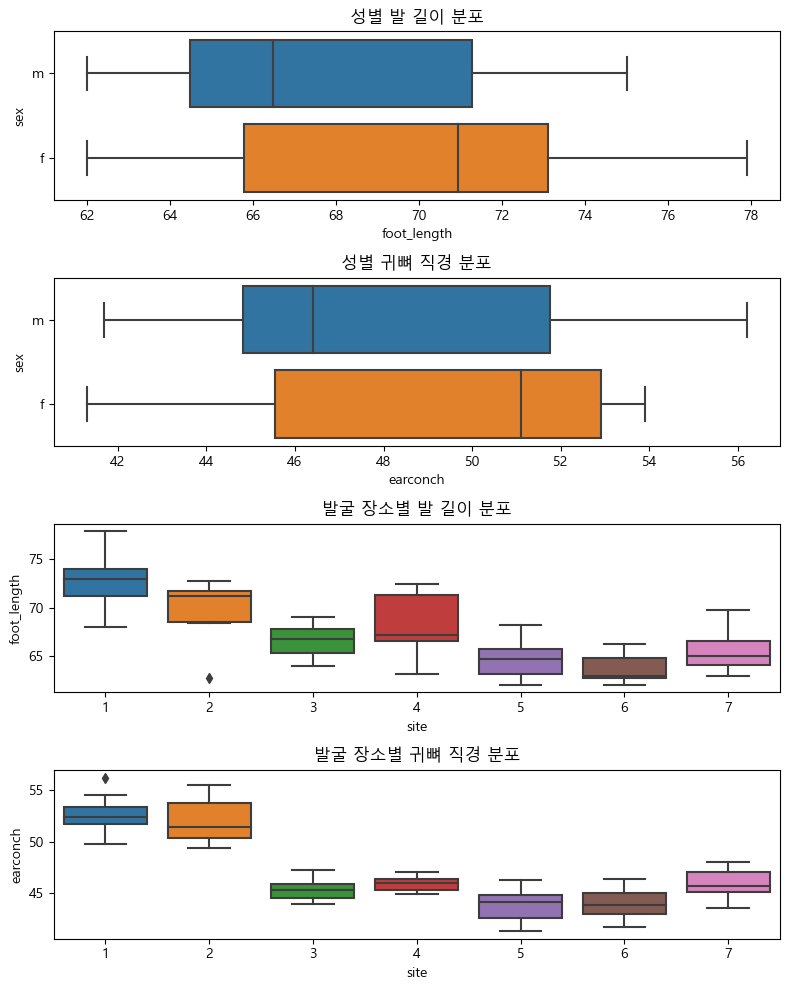

In [14]:
fig, axes = plt.subplots(4, figsize=(8, 10))

sns.boxplot(x='foot_length', y='sex', data=df_train, ax=axes[0])
axes[0].set_title('성별 발 길이 분포')

sns.boxplot(x='earconch', y='sex', data=df_train, ax=axes[1])
axes[1].set_title('성별 귀뼈 직경 분포')

sns.boxplot(x='site', y='foot_length', data=df_train, ax=axes[2])
axes[2].set_title('발굴 장소별 발 길이 분포')

sns.boxplot(x='site', y='earconch', data=df_train, ax=axes[3])
axes[3].set_title('발굴 장소별 귀뼈 직경 분포')

plt.tight_layout()
plt.show()

# 3. 데이터 전처리

In [15]:
for d in [df_train, df_test]:
    d.drop(columns=['case', 'site', 'foot_length', 'earconch'], inplace=True) # 안 쓸 열 제거
    d['sex'] = d['sex'].map({'m':0, 'f':1}) # 성별 인코딩
df_train

,sex,age,head_length,skull_width,total_length,tail_length,eye,chest,belly
32,0,3.0,91.4,54.6,89.0,37.0,14.8,24.0,30.0
41,0,3.0,85.3,54.1,77.0,32.0,13.8,25.5,33.0
39,1,3.0,91.0,55.0,84.5,36.0,13.6,27.0,30.0
38,1,1.0,84.7,51.5,75.0,34.0,13.0,25.0,25.0
49,1,5.0,91.6,56.4,88.0,38.0,14.9,28.0,36.0
...,...,...,...,...,...,...,...,...,...
78,0,1.0,85.8,50.0,81.0,36.5,14.8,22.0,28.5
9,1,6.0,91.8,58.0,89.5,37.5,14.4,27.5,32.0
75,0,5.0,92.4,56.8,89.0,41.0,17.8,26.0,33.0
12,0,5.0,95.1,59.9,89.5,36.0,15.8,27.0,32.0


In [16]:
df_train, df_valid = train_test_split(df_train, test_size=0.2, random_state=1) # train/valid 분할

# 크기 측정 데이터 표준화
scaler = StandardScaler()
df_train.loc[:, 'head_length':] = scaler.fit_transform(df_train.loc[:, 'head_length':])
df_valid.loc[:, 'head_length':] = scaler.transform(df_valid.loc[:, 'head_length':])
df_test.loc[:, 'head_length':] = scaler.transform(df_test.loc[:, 'head_length':])

# X, y 분할
X_train = df_train.drop(columns='age')
y_train = df_train['age']
X_valid = df_valid.drop(columns='age')
y_valid = df_valid['age']
X_test = df_test.drop(columns='age')
y_test = df_test['age']

# 4. 모델 선택

In [17]:
# 선형 회귀
lr = LinearRegression()
model = lr.fit(X_train, y_train)

p_valid = lr.predict(X_valid)
rmse = mean_squared_error(y_valid, p_valid, squared=False)
print(f"선형 회귀) RMSE: {rmse}")

# 최고 모델 기록
best_model = model
best_score = rmse


# 다항 회귀 (degree: 2 ~ 5)
for d in range(2, 6):
    lr_pipe = Pipeline([('poly', PolynomialFeatures(degree=d)),
                     ('lr', LinearRegression())])
    model = lr_pipe.fit(X_train, y_train)
    
    p_valid = lr_pipe.predict(X_valid)
    rmse = mean_squared_error(y_valid, p_valid, squared=False)
    print(f"{d}차 다항 회귀) RMSE: {rmse}")
    
    # 최고 모델 기록
    if rmse < best_score:
        best_model = model
        best_score = rmse

선형 회귀) RMSE: 1.9673294518402993
2차 다항 회귀) RMSE: 5.852952208975132
3차 다항 회귀) RMSE: 3.324560383237005
4차 다항 회귀) RMSE: 2.219613602364989
5차 다항 회귀) RMSE: 4.447785007057057


# 5. 모델 평가

In [18]:
p_test = best_model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, p_test, squared=False))
print('MAE:', mean_absolute_error(y_test, p_test))

RMSE: 2.018378333212551
MAE: 1.5922729029375995
